In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt # Changed matplotlib to matplotlib.pyplot and aliased as plt
import pandas as pd
from IPython.display import display
from tensorflow.keras.activations import linear, relu, sigmoid
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder

import xgboost as xgb
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deepu1109/star-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'star-dataset' dataset.
Path to dataset files: /kaggle/input/star-dataset


In [3]:
df = pd.read_csv(path+'/6 class csv.csv')

In [4]:

data=np.array(df)
display(df)

display(df.isnull().sum())
display(df.describe())
startype={0:"Brown Dwarf",

1:'Red Dwarf',

2:'White Dwarf',

3:'Main Sequence',

4:'Supergiant',

5:'Hypergiant'

}

display(df['Star type'].value_counts())
#for i in range(len(df.columns)):
# if type(data[0,i])==int or type(data[0,i])==float:
  #  plt.hist(data[:,i])
  #  plt.title(df.columns[i]) # Changed matplotlib.hist to plt.hist
   # plt.show()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


,0
Temperature (K),0
Luminosity(L/Lo),0
Radius(R/Ro),0
Absolute magnitude(Mv),0
Star type,0
Star color,0
Spectral Class,0


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


,count
Star type,
0,40
1,40
2,40
3,40
4,40
5,40


<Axes: >

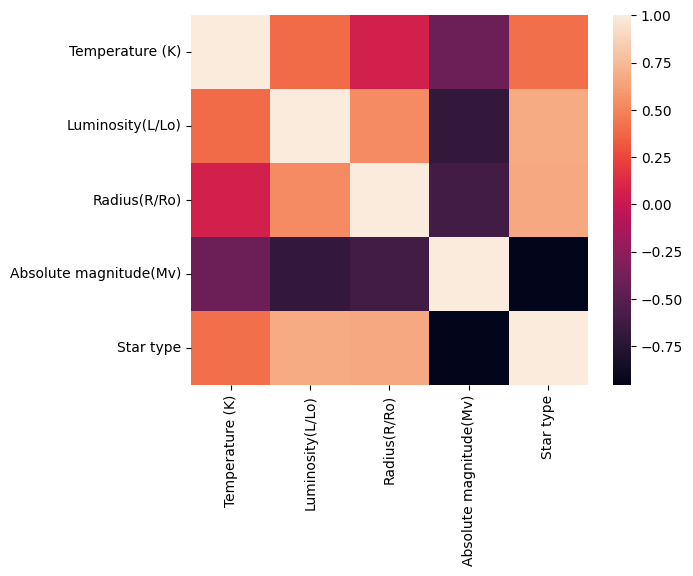

In [5]:
sns.heatmap(df.drop(['Star color','Spectral Class'],axis=1).corr())

In [6]:
display(df['Star color'].value_counts())

#display(df['Spectral Class'].value_counts())



def Colorcleanup(cval):
  if 'white' in cval.lower() and 'blue' in cval.lower():
    return 'Blue White'
  elif 'white' in cval.lower() and 'yellow' in cval.lower():
    return 'Yellow White'
  elif 'whit' in cval.lower():
    return 'White'
  elif 'blue' in cval.lower():
    return 'Blue'
  elif 'yellow' in cval.lower():
    return 'Yellow'
  return cval

df['Star color']=df['Star color'].apply(Colorcleanup)
display(df['Star color'].value_counts())


,count
Star color,
Red,112
Blue,55
Blue-white,26
Blue White,10
yellow-white,8
White,7
Yellowish White,3
Blue white,3
white,3


,count
Star color,
Red,112
Blue,56
Blue White,41
White,12
Yellow White,12
Yellow,4
Orange,2
Orange-Red,1


In [7]:
ordenc=OrdinalEncoder(categories=[['M','K','G','F','A','B','O']])
df['Spectral Class']=ordenc.fit_transform(df[['Spectral Class']])

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Spectral Class,Star color_Blue,Star color_Blue White,Star color_Orange,Star color_Orange-Red,Star color_Red,Star color_White,Star color_Yellow,Star color_Yellow White
0,3068,0.002400,0.1700,16.12,0,0.0,False,False,False,False,True,False,False,False
1,3042,0.000500,0.1542,16.60,0,0.0,False,False,False,False,True,False,False,False
2,2600,0.000300,0.1020,18.70,0,0.0,False,False,False,False,True,False,False,False
3,2800,0.000200,0.1600,16.65,0,0.0,False,False,False,False,True,False,False,False
4,1939,0.000138,0.1030,20.06,0,0.0,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,6.0,True,False,False,False,False,False,False,False
236,30839,834042.000000,1194.0000,-10.63,5,6.0,True,False,False,False,False,False,False,False
237,8829,537493.000000,1423.0000,-10.73,5,4.0,False,False,False,False,False,True,False,False
238,9235,404940.000000,1112.0000,-11.23,5,4.0,False,False,False,False,False,True,False,False


(240, 13)

(240, 1)

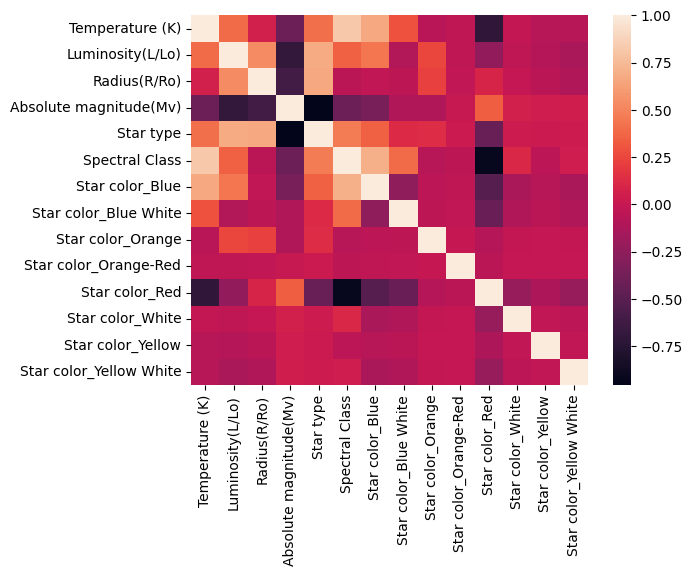

In [8]:

df=pd.get_dummies(df, columns=['Star color'])
display(df)
sns.heatmap(df.corr())
df['Luminosity(L/Lo)'] = np.log1p(df['Luminosity(L/Lo)'])
df['Radius(R/Ro)'] = np.log1p(df['Radius(R/Ro)'])
df['Temperature (K)'] = np.log1p(df['Temperature (K)'])
X=np.array(df.drop(columns=['Star type']))
Y=np.array(df['Star type']).reshape(len(data),1)
X=X.astype('float')
Y=Y.astype('float')
display(X.shape)
display(Y.shape)

In [9]:
print(df[['Spectral Class']])

     Spectral Class
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
..              ...
235             6.0
236             6.0
237             4.0
238             4.0
239             6.0

[240 rows x 1 columns]


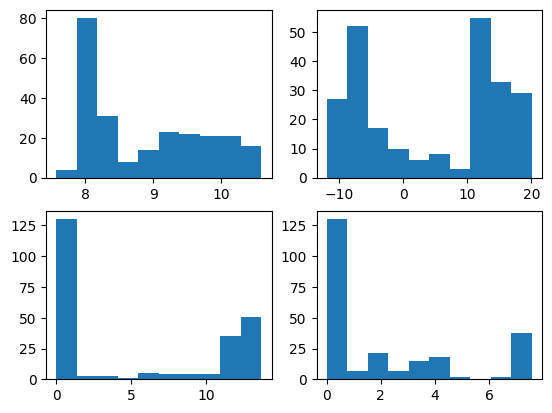

In [10]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(df['Temperature (K)'])
axes[0, 1].hist(df['Absolute magnitude(Mv)'])
axes[1, 0].hist(df['Luminosity(L/Lo)'])
axes[1, 1].hist(df['Radius(R/Ro)'])
plt.show()

In [11]:
scaler=StandardScaler()
X=scaler.fit_transform(X)





Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.4,random_state=42)

Xtest,Xcv,Ytest,Ycv=train_test_split(Xtest,Ytest,test_size=0.5,random_state=42)

print(Xtrain.shape)
print(Xtest.shape)
print(Xcv.shape)
print(Ytrain.shape)
print(Ytest.shape)
print(Ycv.shape)

(144, 13)
(48, 13)
(48, 13)
(144, 1)
(48, 1)
(48, 1)


In [12]:
model=Sequential([
 Dense(10,activation='relu'),
 Dense(6,activation='linear')
]
)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
v=model.fit(Xtrain,Ytrain,epochs=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 2.1631
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0033 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6687
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4827 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3911
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3031
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2851
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1857
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1812
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1872
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1410
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1306
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1184
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0877
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0996 
Epoch 16/100
5/5 

In [13]:
def classificationerror(yhat,y):
  m = len(y)
  incorrect = 0
  for i in range(m):
    ### START CODE HERE ###
    incorrect+= int(y[i,0]!=yhat[i,0])

  cerr=incorrect/m
    ### END CODE HERE ###

  return(cerr)

In [14]:
yhat=model.predict(Xtest).argmax(axis=1).reshape(len(Xtest),1)
print(classificationerror(yhat,Ytest))

print(classificationerror(model.predict(X).argmax(axis=1).reshape(len(X),1),Y))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
0.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
0.008333333333333333


In [17]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(Xtrain, Ytrain)
dty_pred = dt.predict(Xtest)
print(f"Decision Tree Classification Error: {classificationerror(dty_pred.reshape(-1, 1), Ytest)}")


rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(Xtrain, Ytrain)

rfy_pred = rf.predict(Xtest)
print(f"Random Forest Classification Error: {classificationerror(rfy_pred.reshape(-1, 1), Ytest)}")


svm = SVC(random_state=1)
svm.fit(Xtrain, Ytrain)

svy_pred = svm.predict(Xtest)
print(f"SVM Classification Error: {classificationerror(svy_pred.reshape(-1, 1), Ytest)}")


log_reg = LogisticRegression(max_iter=1000, penalty=None) # Increased max_iter
log_reg.fit(Xtrain,Ytrain)

logy_pred=log_reg.predict(Xtest)
print(f"Logistic Regression Classification Error: {classificationerror(logy_pred.reshape(-1, 1), Ytest)}")


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = xgb.XGBClassifier(
    objective='multi:softprob',   # Use 'multi:softmax' if you want class labels directly
    num_class=len(startype),  # Total number of distinct classes, used len(startype) instead of number_of_classes
    eval_metric='mlogloss'        # Optional, but good practice
)

# Train the model
model.fit(Xtrain, Ytrain)

# Predict probabilities for each class
y_pred_proba = model.predict_proba(Xtest)

# Predict class labels
y_pred = model.predict(Xtest)
print(f"XGBoost Classification Error: {classificationerror(y_pred.reshape(-1, 1), Ytest)}")

Decision Tree Classification Error: 0.0
Random Forest Classification Error: 0.020833333333333332
SVM Classification Error: 0.0625
Logistic Regression Classification Error: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost Classification Error: 0.020833333333333332


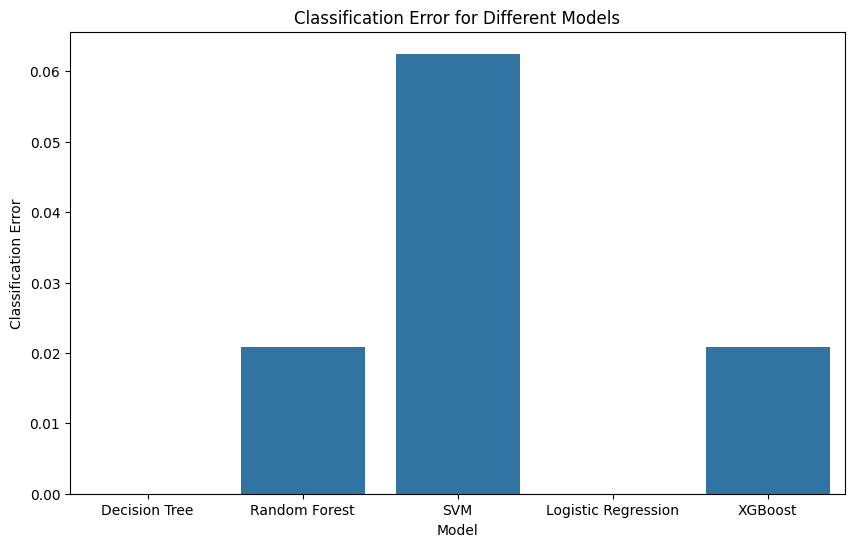

In [18]:
model_errors = {
    'Decision Tree': classificationerror(dty_pred.reshape(-1, 1), Ytest),
    'Random Forest': classificationerror(rfy_pred.reshape(-1, 1), Ytest),
    'SVM': classificationerror(svy_pred.reshape(-1, 1), Ytest),
    'Logistic Regression': classificationerror(logy_pred.reshape(-1, 1), Ytest),
    'XGBoost': classificationerror(y_pred.reshape(-1, 1), Ytest)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_errors.keys()), y=list(model_errors.values()))
plt.title('Classification Error for Different Models')
plt.ylabel('Classification Error')
plt.xlabel('Model')
plt.show()